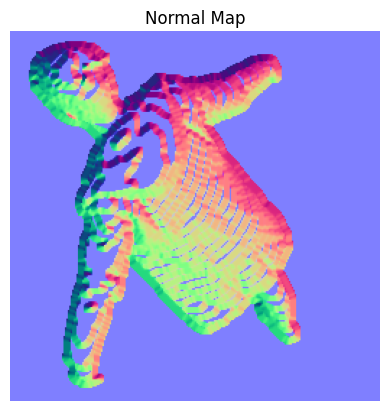

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compute_normals(depth_map):
    # Compute the gradients in x and y directions
    grad_x = cv2.Sobel(depth_map, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(depth_map, cv2.CV_64F, 0, 1, ksize=5)

    # The z-component of the normal vector is 1
    # We're assuming the depth is constant along the z-axis (orthographic projection)
    normal_z = np.ones_like(depth_map, dtype=np.float64)

    # Stack the gradients to get the 3-component normal vectors
    normals = np.dstack((-grad_x, -grad_y, normal_z))

    # Normalize the normal vectors
    normals_magnitude = np.linalg.norm(normals, axis=2)
    normals /= normals_magnitude[:, :, np.newaxis]

    # Handle division by zero in case of flat regions (where magnitude is zero)
    normals = np.nan_to_num(normals)

    return normals

# Load the depth image from the file
depth_image_path = '/content/DepthMap20230913025512.png'
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)

# Convert the image to grayscale to get the depth information
# Assuming the depth information is encoded in the RGB channels equally
depth_image_gray = cv2.cvtColor(depth_image, cv2.COLOR_BGR2GRAY)

# Compute the normals
normals = compute_normals(depth_image_gray)

# Display the normals as an image
# The x, y, and z components are mapped to the red, green, and blue channels respectively
normal_image = 0.5 * normals + 0.5  # Normalizing from [-1, 1] to [0, 1] for display
plt.imshow(normal_image)
plt.title('Normal Map')
plt.axis('off')  # Hide the axis
plt.show()


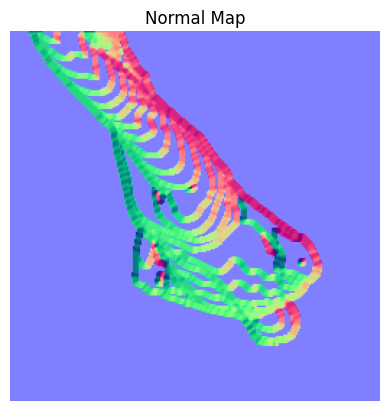

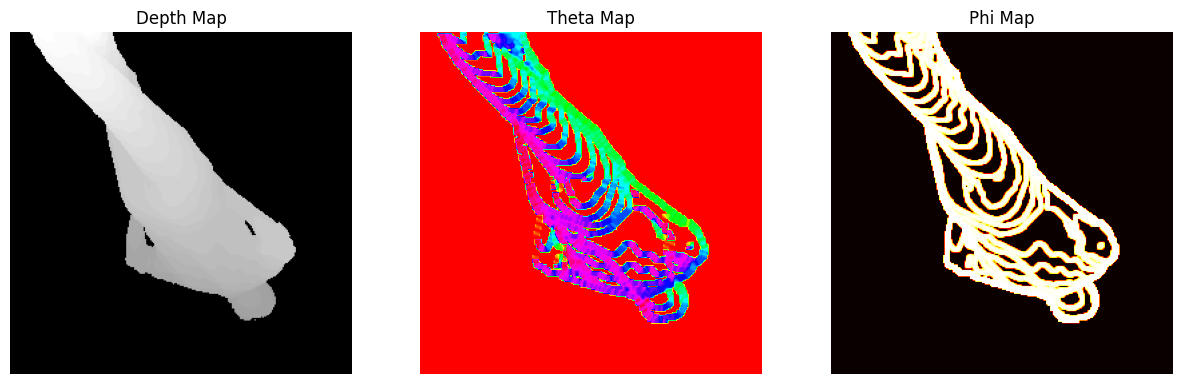

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compute_normals(depth_map):
    grad_x = cv2.Sobel(depth_map, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(depth_map, cv2.CV_64F, 0, 1, ksize=5)
    normal_z = np.ones_like(depth_map, dtype=np.float64)
    normals = np.dstack((-grad_x, -grad_y, normal_z))
    normals_magnitude = np.linalg.norm(normals, axis=2)
    normals /= normals_magnitude[:, :, np.newaxis]
    normals = np.nan_to_num(normals)
    return normals

def cartesian_to_spherical(x, y, z):
    norm = np.sqrt(x**2 + y**2 + z**2)
    x, y, z = x / norm, y / norm, z / norm
    theta = np.arctan2(y, x)
    phi = np.arccos(z)
    return theta, phi

# Load the depth image from the file (replace 'depth_image_path' with your actual file path)
depth_image_path = '/content/DepthMap20230913105944.png' # Replace with your file path
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)
depth_image_gray = cv2.cvtColor(depth_image, cv2.COLOR_BGR2GRAY)
normals = compute_normals(depth_image_gray)

# Convert normal vectors to spherical coordinates
spherical_coords = np.zeros((normals.shape[0], normals.shape[1], 2))
for i in range(normals.shape[0]):
    for j in range(normals.shape[1]):
        x, y, z = normals[i, j]
        theta, phi = cartesian_to_spherical(x, y, z)
        spherical_coords[i, j] = np.array([theta, phi])

# Display the normal map as an image
normal_image = 0.5 * normals + 0.5  # Normalize for display purposes
plt.imshow(normal_image)
plt.title('Normal Map')
plt.axis('off')
plt.show()

# ... (previous code)

# Visualize spherical coordinates
theta_image = spherical_coords[:, :, 0]  # Extract theta values
phi_image = spherical_coords[:, :, 1]    # Extract phi values

# Map theta from [-pi, pi] to [0, 1] for visualization
theta_normalized = (theta_image + np.pi) / (2 * np.pi)
phi_normalized = phi_image / np.pi

# Create a figure to display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the original depth map
axes[0].imshow(depth_image_gray, cmap='gray')
axes[0].set_title('Depth Map')
axes[0].axis('off')

# Display the theta image
axes[1].imshow(theta_normalized, cmap='hsv')  # HSV colormap to show circular data
axes[1].set_title('Theta Map')
axes[1].axis('off')

# Display the phi image
axes[2].imshow(phi_normalized, cmap='hot')    # Hot colormap for angular data
axes[2].set_title('Phi Map')
axes[2].axis('off')

# Show the plot
plt.show()



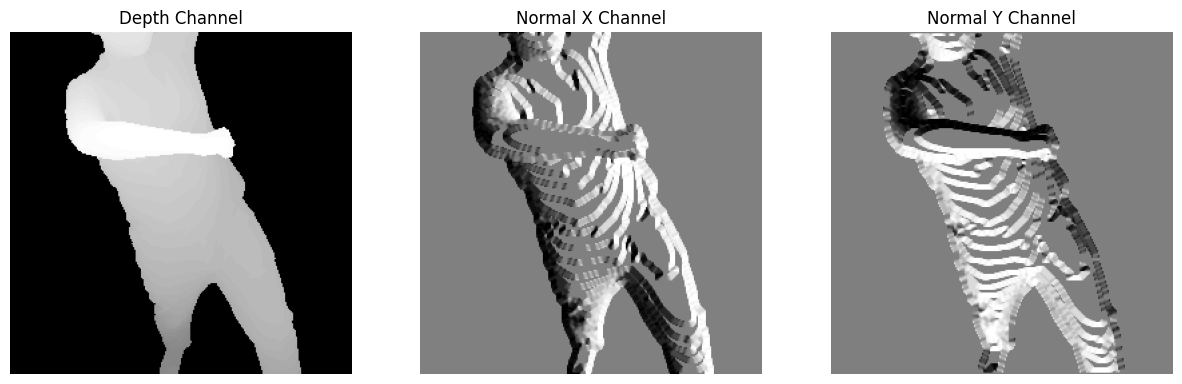

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compute_normals(depth_map):
    # Compute the gradients in x and y directions
    grad_x = cv2.Sobel(depth_map, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(depth_map, cv2.CV_64F, 0, 1, ksize=5)

    # The z-component of the normal vector is constant
    normal_z = np.ones_like(depth_map, dtype=np.float64)

    # Combine gradients to form the normal vectors
    normals = np.dstack((-grad_x, -grad_y, normal_z))

    # Normalize the normal vectors
    normals_magnitude = np.linalg.norm(normals, axis=2)
    normals /= normals_magnitude[:, :, np.newaxis]

    # Handle division by zero in case of flat regions where magnitude is zero
    normals = np.nan_to_num(normals)

    return normals

def merge_with_depth(normals, depth_map):
    # Assuming depth_map values are normalized between 0 and 255 for display
    depth_normalized = cv2.normalize(depth_map, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)

    # Extract the horizontal and vertical components from the normals
    normal_x = normals[:, :, 0]  # x component of the normals
    normal_y = normals[:, :, 1]  # y component of the normals

    # Merge depth with normal_x and normal_y into a single image with 3 channels
    merged_image = cv2.merge((depth_normalized, normal_x, normal_y))
    return merged_image

# Load and process the depth image
depth_image_path = '/content/DepthMap20230913001742.png'  # Replace with your depth image path
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)
depth_image_gray = cv2.cvtColor(depth_image, cv2.COLOR_BGR2GRAY)

# Compute normals using the provided function
normals = compute_normals(depth_image_gray)

# Merge normals with depth information
merged_normal_depth_image = merge_with_depth(normals, depth_image_gray)

# Split the merged image for separate channel visualization
depth_channel, normal_x_channel, normal_y_channel = cv2.split(merged_normal_depth_image)

# Plot the depth and normal channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for three channels
channels = [depth_channel, normal_x_channel, normal_y_channel]
titles = ['Depth Channel', 'Normal X Channel', 'Normal Y Channel']

for ax, channel, title in zip(axes, channels, titles):
    ax.imshow(channel, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()



In [ ]:
merged_normal_depth_image.shape

(256, 256, 3)

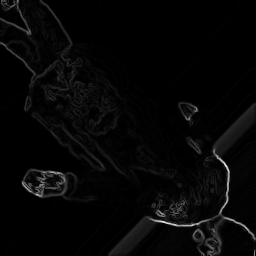

In [ ]:
import cv2
import numpy as np

def enhance_surface_features(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filters for edge enhancement
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Sobel Horizontal
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Vertical

    # Combine Sobel X and Y
    sobel_combined = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2), 1, cv2.pow(sobely, 2), 1, 0))

    # Normalize the Sobel image
    sobel_normalized = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)



    return sobel_normalized

# Replace 'path_to_your_image.png' with the path to your PNG image
enhanced_image = enhance_surface_features('/content/Snapshot_20230913_025519.png')

# Display the image
# In a Jupyter Notebook environment, use cv2_imshow
cv2_imshow(enhanced_image)

# In a standard Python environment, use cv2.imshow
# cv2.imshow('Enhanced Surface Features', enhanced_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


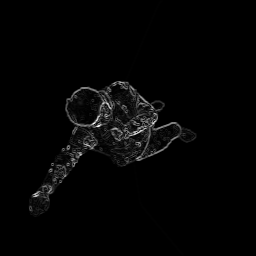

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def enhance_surface_features(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Optionally increase contrast (can be adjusted or omitted)
    alpha = 1  # Contrast control
    adjusted = cv2.convertScaleAbs(gray, alpha=alpha)

    # Apply Sobel filters with a smaller kernel size
    sobelx = cv2.Sobel(adjusted, cv2.CV_64F, 1, 0, ksize=3)  # Sobel Horizontal
    sobely = cv2.Sobel(adjusted, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Vertical

    # Combine Sobel X and Y with different weights
    sobel_combined = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2), 0.5, cv2.pow(sobely, 2), 1.5, 0))

    # Normalize with a lower upper threshold
    sobel_normalized = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

    return sobel_normalized

# Replace 'path_to_your_image.png' with the path to your PNG image
enhanced_image = enhance_surface_features('/content/Snapshot_20230921_002438.png')

# Display the image using cv2_imshow
cv2_imshow(enhanced_image)


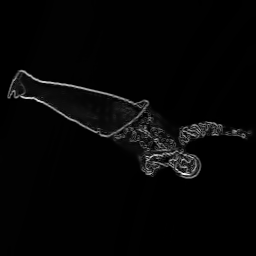

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def enhance_surface_features(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Optionally increase contrast (can be adjusted or omitted)
    alpha = 1.5  # Contrast control (adjust as needed)
    adjusted = cv2.convertScaleAbs(gray, alpha=alpha)

    # Apply Sobel filters
    sobelx = cv2.Sobel(adjusted, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(adjusted, cv2.CV_64F, 0, 1, ksize=3)

    # Combine Sobel X and Y
    sobel_combined = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2), 0.5, cv2.pow(sobely, 2), 1.5, 0))

    # Normalize
    sobel_normalized = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

    # Denoising
    denoised_image = cv2.fastNlMeansDenoising(sobel_normalized, None, h=10, templateWindowSize=7, searchWindowSize=21)

    return denoised_image

# Replace 'path_to_your_image.png' with the path to your PNG image
enhanced_denoised_image = enhance_surface_features('/content/Snapshot_20230921_002510.png')

# Display the image
cv2_imshow(enhanced_denoised_image)


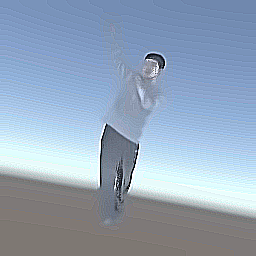

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def enhance_image_quality(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Upscale the image (2x)

    # Adjust brightness and contrast
    enhanced = cv2.convertScaleAbs(image, alpha=1, beta=20)

    # Reduce noise
    denoised = cv2.fastNlMeansDenoisingColored(enhanced, None, 10, 10, 7, 21)

    # Sharpen the image
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    sharpened = cv2.filter2D(denoised, -1, kernel)

    return sharpened

# Replace 'path_to_your_image.jpg' with the path to your image
enhanced_image = enhance_image_quality('/content/Snapshot_20230921_002436.png')

# Display the enhanced image
cv2_imshow(enhanced_image)


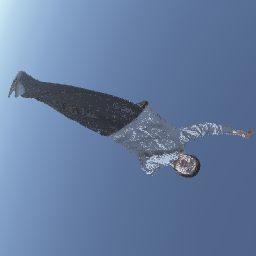

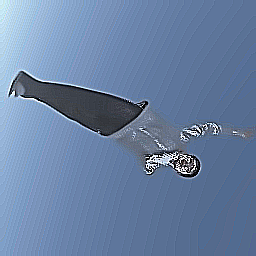

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def enhance_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Improve brightness and contrast
    alpha = 1  # Contrast control (1.0-3.0)
    beta = 5    # Brightness control (0-100)
    bright_contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Reduce noise
    denoised_image = cv2.fastNlMeansDenoisingColored(bright_contrast_image, None, 10, 10, 7, 10)

    # Sharpen the image
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    sharpened_image = cv2.filter2D(denoised_image, -1, kernel)

    return image, sharpened_image

# Replace 'path_to_your_image.jpg' with the path to your image
original_image, enhanced_image = enhance_image('/content/Snapshot_20230921_002510.png')

# Display the original and enhanced images
cv2_imshow(original_image)
cv2_imshow(enhanced_image)


Saving Snapshot_20230921_002436.png to Snapshot_20230921_002436.png


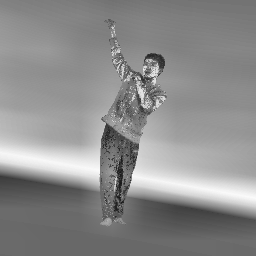

In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Apply CLAHE
    clahe_image = clahe.apply(image)

    return clahe_image

# Upload file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE
enhanced_image = apply_clahe(image)

# Save and display the result
output_path = 'enhanced_image.png'
cv2.imwrite(output_path, enhanced_image)
display(Image(output_path))


Saving Snapshot_20230914_220511.png to Snapshot_20230914_220511.png


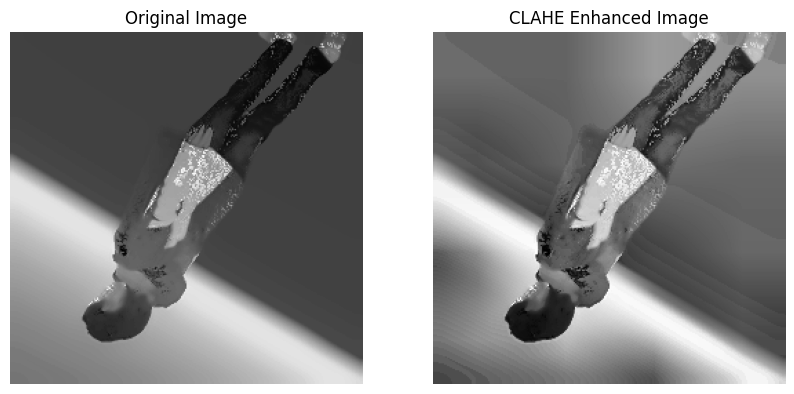

(256, 256)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def apply_clahe(image, clip_limit=8.0, tile_grid_size=(4, 4)):
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Apply CLAHE
    clahe_image = clahe.apply(image)

    return clahe_image

# Upload file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE
enhanced_image = apply_clahe(image)

# Plotting original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.axis('off')

plt.show()
enhanced_image.shape

Saving Snapshot_20230914_220509.png to Snapshot_20230914_220509 (1).png


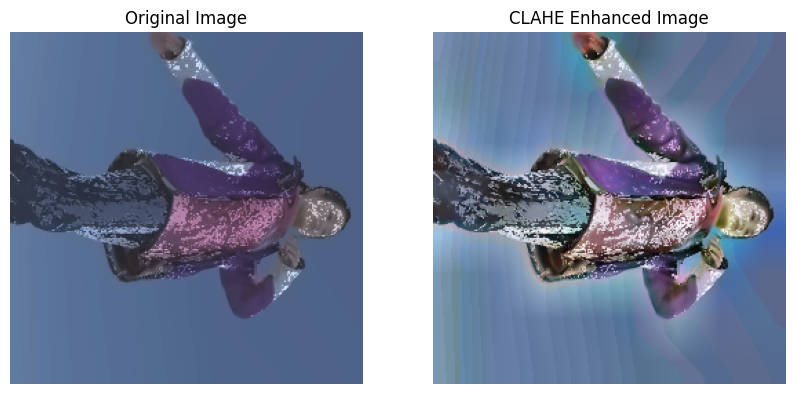

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def apply_clahe_color(image, clip_limit=6.0, tile_grid_size=(8, 8)):
    # Split the image into its BGR components
    channels = cv2.split(image)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Apply CLAHE to each channel
    clahe_channels = [clahe.apply(channel) for channel in channels]

    # Merge the channels back together
    clahe_image = cv2.merge(clahe_channels)

    return clahe_image

# Upload file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read the image in color
image = cv2.imread(image_path)

# Apply CLAHE to color image
enhanced_image = apply_clahe_color(image)

# Plotting original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('CLAHE Enhanced Image')
plt.axis('off')

plt.show()


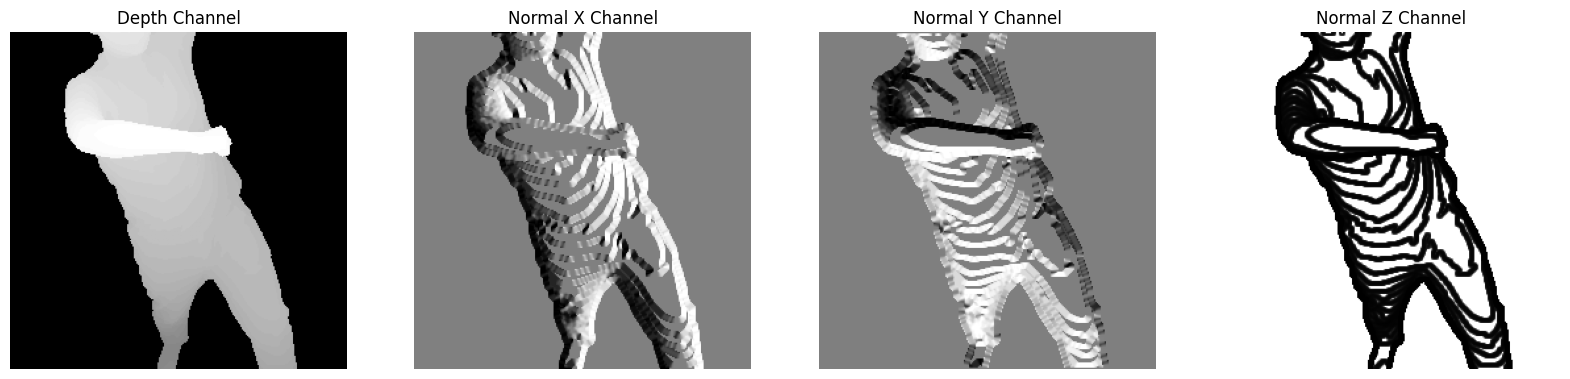

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compute_normals(depth_map):
    # Compute the gradients in x and y directions
    grad_x = cv2.Sobel(depth_map, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(depth_map, cv2.CV_64F, 0, 1, ksize=5)

    # Calculate the z-component of the normal vector using the depth values
    grad_z = np.ones_like(depth_map, dtype=np.float64)  # Constant value 1

    # Combine gradients to form the normal vectors
    normals = np.dstack((-grad_x, -grad_y, grad_z))

    # Normalize the normal vectors
    normals_magnitude = np.linalg.norm(normals, axis=2)
    normals /= normals_magnitude[:, :, np.newaxis]

    # Handle division by zero in case of flat regions where magnitude is zero
    normals = np.nan_to_num(normals)

    return normals

def merge_with_depth(normals, depth_map):
    # Assuming depth_map values are normalized between 0 and 255 for display
    depth_normalized = cv2.normalize(depth_map, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)

    # Extract the individual components from the normals
    normal_x = normals[:, :, 0]
    normal_y = normals[:, :, 1]
    normal_z = normals[:, :, 2]

    # Merge depth, normal_x, normal_y, and normal_z into a single image with 4 channels
    merged_image = cv2.merge((depth_normalized, normal_x, normal_y, normal_z))
    return merged_image

# Load and process the depth image
depth_image_path = '/content/DepthMap20230913001741.png'  # Replace with your depth image path
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)
depth_image_gray = cv2.cvtColor(depth_image, cv2.COLOR_BGR2GRAY)

# Compute normals using the provided function
normals = compute_normals(depth_image_gray)

# Merge normals with depth information
merged_normal_depth_image = merge_with_depth(normals, depth_image_gray)

# Split the merged image for separate channel visualization
depth_channel, normal_x_channel, normal_y_channel, normal_z_channel = cv2.split(merged_normal_depth_image)

# Plot the depth and normal channels
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns for four channels
channels = [depth_channel, normal_x_channel, normal_y_channel, normal_z_channel]
titles = ['Depth Channel', 'Normal X Channel', 'Normal Y Channel', 'Normal Z Channel']

for ax, channel, title in zip(axes, channels, titles):
    ax.imshow(channel, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


Saving Snapshot_20230921_220503.png to Snapshot_20230921_220503 (2).png


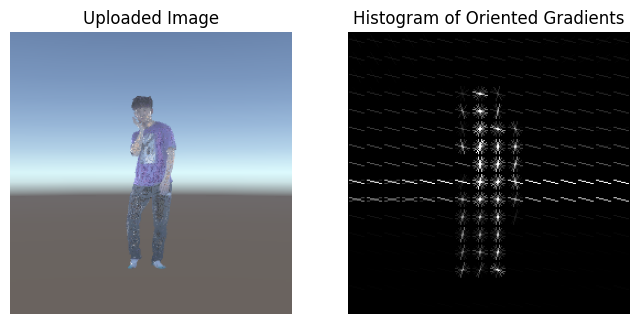

In [ ]:
# Import necessary libraries
from google.colab import files
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io, exposure

# Upload an image file
uploaded = files.upload()

# Check if any files were uploaded
if len(uploaded) > 0:
    # Get the first uploaded image file (you can modify this if needed)
    image_filename = list(uploaded.keys())[0]

    # Read the uploaded image
    uploaded_image = io.imread(image_filename)

    # Compute HOG features
    fd, hog_image = hog(uploaded_image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, channel_axis=-1)

    # Create a Matplotlib figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    # Display the uploaded image
    ax1.axis('off')
    ax1.imshow(uploaded_image, cmap=plt.cm.gray)
    ax1.set_title('Uploaded Image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Display the HOG image
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')

    # Show the Matplotlib plot
    plt.show()
else:
    print("No files were uploaded.")


Saving DepthMap20230920210627.png to DepthMap20230920210627.png
Shape of HOG feature descriptor: (2048,)
Number of dimensions: 1
Number of channels: None (HOG features do not have channels like an image)


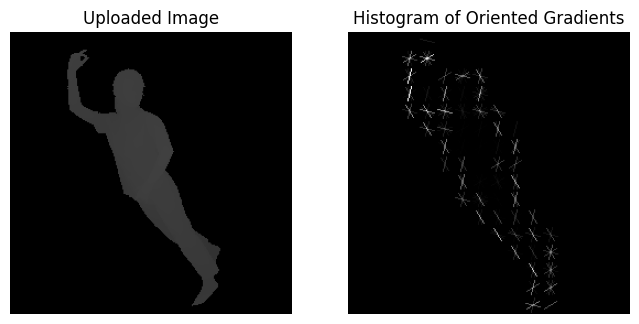

In [ ]:
from skimage.feature import hog
from skimage import io, exposure
from google.colab import files
import matplotlib.pyplot as plt

# Function to upload an image and compute HOG features
def upload_and_compute_hog():
    # Upload an image file
    uploaded = files.upload()

    # Check if any files were uploaded
    if len(uploaded) > 0:
        # Get the first uploaded image file
        image_filename = list(uploaded.keys())[0]

        # Read the uploaded image
        uploaded_image = io.imread(image_filename)

        # Compute HOG features
        fd, hog_image = hog(uploaded_image, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True, channel_axis=-1)

        # Print the shape of the HOG feature descriptor
        print("Shape of HOG feature descriptor:", fd.shape)
        print("Number of dimensions:", fd.ndim)
        print("Number of channels: None (HOG features do not have channels like an image)")

        # Plotting the original and HOG images
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        # Display the original image
        ax1.axis('off')
        ax1.imshow(uploaded_image, cmap=plt.cm.gray)
        ax1.set_title('Uploaded Image')

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # Display the HOG image
        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        ax2.set_title('Histogram of Oriented Gradients')

        # Show the plot
        plt.show()
    else:
        print("No files were uploaded.")

# Run the function
upload_and_compute_hog()


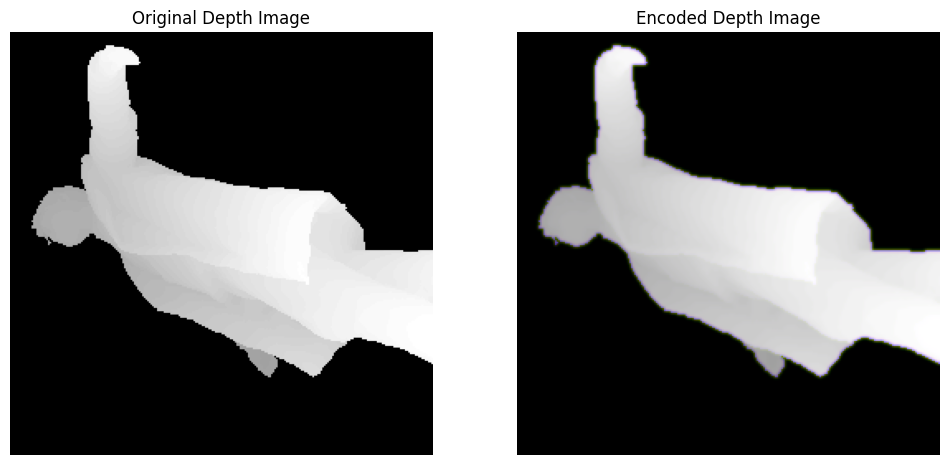

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_convolution_based_encoding(depth_image_path):
    # Load the depth image in grayscale
    depth_image = cv2.imread(depth_image_path, cv2.IMREAD_GRAYSCALE)

    # Normalize the depth image
    normalized_depth = cv2.normalize(depth_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # Apply a 5x5 Gaussian filter for channel 2
    gaussian_5x5 = cv2.GaussianBlur(normalized_depth, (5, 5), 0)

    # Apply a 3x3 Gaussian filter for channel 3
    gaussian_3x3 = cv2.GaussianBlur(normalized_depth, (3, 3), 0)

    # Stack the channels to form a 3-channel image
    encoded_image = np.stack((normalized_depth, gaussian_5x5, gaussian_3x3), axis=-1)

    # Convert back to 8-bit image to visualize
    encoded_image_visual = np.uint8(255 * encoded_image)
    return encoded_image_visual

# Replace 'path_to_your_depth_image.png' with your depth image file path
depth_image_path = '/content/DepthMap20230913025509.png'
encoded_image = apply_convolution_based_encoding(depth_image_path)

# Plotting the results
plt.figure(figsize=(12, 6))

# Original Depth Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(depth_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Original Depth Image')
plt.axis('off')

# Encoded Depth Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(encoded_image, cv2.COLOR_BGR2RGB))
plt.title('Encoded Depth Image')
plt.axis('off')

plt.show()


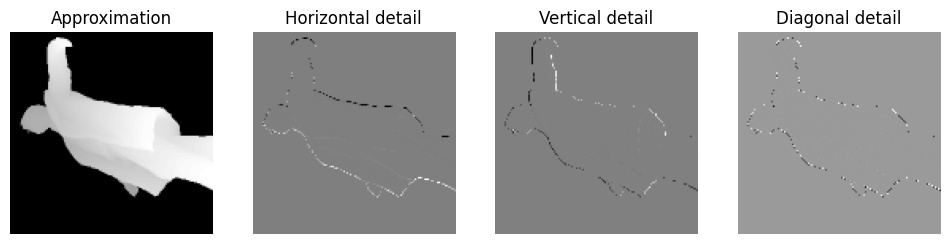

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load your depth image
depth_image_path = '/content/DepthMap20230913025509.png'
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_GRAYSCALE)

# Perform a single level wavelet decomposition
coeffs = pywt.dwt2(depth_image, 'haar')
cA, (cH, cV, cD) = coeffs

# Visualize the components
plt.figure(figsize=(12, 3))
titles = ['Approximation', 'Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for i, a in enumerate([cA, cH, cV, cD]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(a, cmap=plt.cm.gray)
    plt.title(titles[i], fontsize=12)
    plt.axis('off')
plt.show()
